# Load model

In [67]:
# Load model from xml file
from cobra import io
rmodel = io.read_sbml_model('roots_model.xml')

No objective coefficients in model. Unclear what should be optimized


In [68]:
# Add RegrEx constraint and solve
import importlib, sys
if 'build_roots_model' in sys.modules:
    importlib.reload(sys.modules['build_roots_model'])
from build_roots_model import *
from cobra.flux_analysis.parsimonious import pfba
rmodel=rootsConstrProtons(rmodel)
rmodel=add_maint_constraints(rmodel)
rootspFBAobj(rmodel)
sol=rmodel.optimize()

# Generate Figure 2

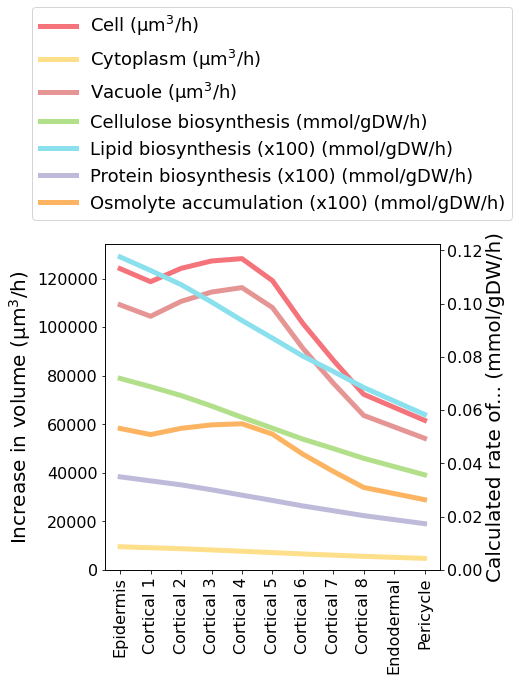

In [14]:
from cleaner_roots import *
cell_dimensions_data_path='roots-model/model_constraints_data/cell_dimensions.xlsx'
vol_vs_change(rmodel,cell_dimensions_data_path)

# Generate plots used in Figure 4

In [69]:
from cleaner_roots import *
col=['#1f78b4', '#b2df8a', '#8ae1ed', '#bebada', '#fdb462', '#d68aed', '#f5737a', '#fee08b', '#e69595', '#66c2a5', '#d690b2', '#3288bd', '#ffff99', '#a6cee3', '#ffffb3', '#6a3d9a', '#ff7f00', '#d9d9d9', '#9e0142', '#b3de69', '#33a02c', '#f46d43', '#abdda4', '#d53e4f', '#fccde5', '#fb8072', '#ccebc5', '#ffffbf', '#e6f598', '#bc80bd', '#5e4fa2', '#e89f82', '#80b1d3', '#ffed6f']
plot_all_sym_transport(sol,rmodel,col)

/Users/user/Documents/Ox/roots/cleaner_roots.py:1574: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[frow][0].set_yticklabels([round(x,2) for x in these_ticks])
/Users/user/Documents/Ox/roots/cleaner_roots.py:1575: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[frow][1].set_yticklabels([round(x,2) for x in these_ticks])


# Generate Figure 5

In [70]:
import sys,importlib
importlib.reload(sys.modules['cleaner_roots'])
from cleaner_roots import *
temp=generate_process_chart_all(rmodel, sol,split_epi=1)

# Generate Figure 7

dict_keys([0, 1, 2, 3])


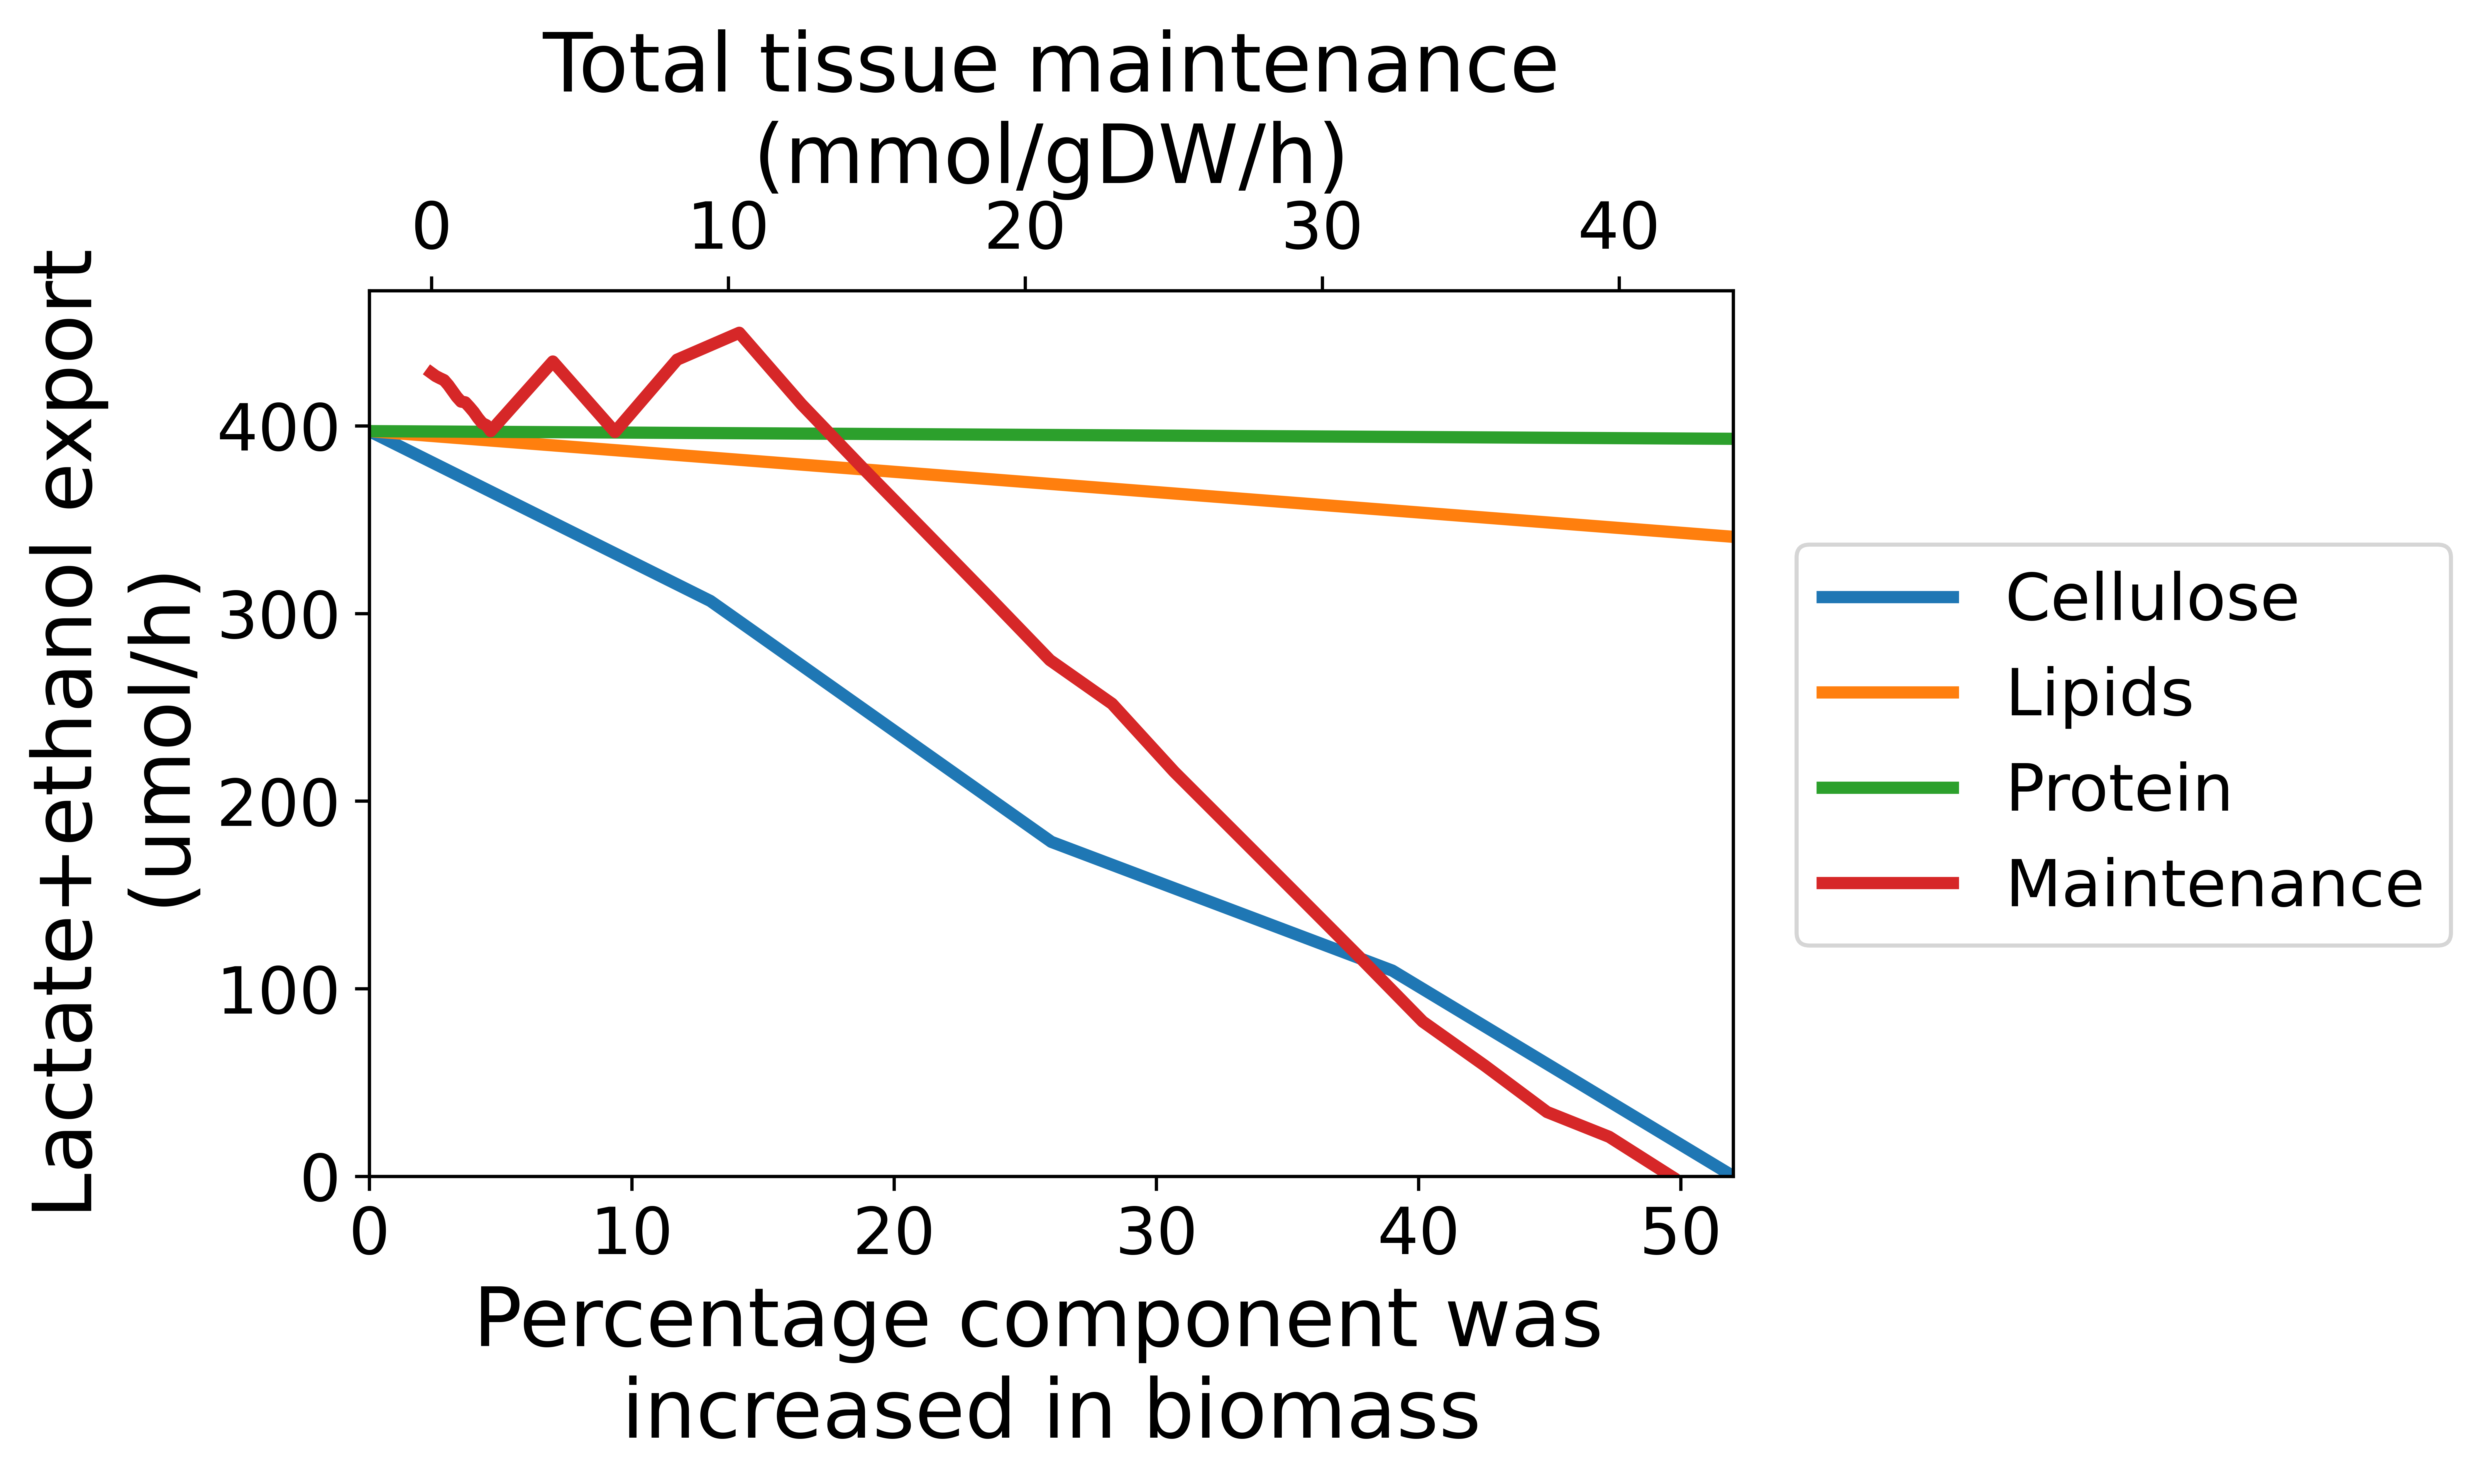

In [64]:
import sys,importlib
if 'cleaner_roots' in sys.modules:
    importlib.reload(sys.modules['cleaner_roots'])
from cleaner_roots import *
fermentation_export(rmodel)

# Generate Figure 8

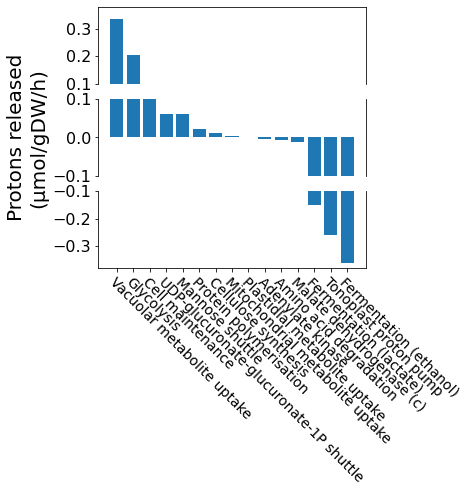

In [71]:
import sys,importlib
if 'cleaner_roots' in sys.modules:
    importlib.reload(sys.modules['cleaner_roots'])
from cleaner_roots import *
# Plot proton budget for cortical, cytosolic protons
corprotc=make_prot_dict(rmodel,sol,cell='_cor')
plot_protons(corprotc,savebool='cor_c',split=1,sumbool=0)

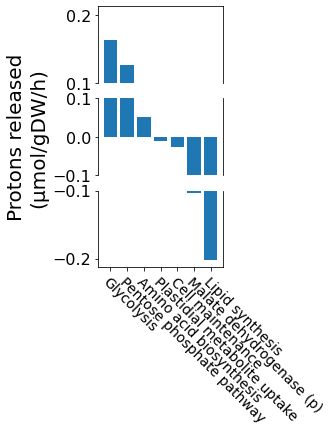

In [72]:
# Plot proton budget for cortical, plastidial protons
corprotp=make_prot_dict(rmodel,sol,cell='_cor',metroot='PROTON_p')
plot_protons(corprotp,savebool='cor_p',split=1,sumbool=0)

# Generate Supplemental Data 1

In [ ]:
no_ferm_model=quietcopy(rmodel)
ferm_rxns=['L_LACTATEDEHYDROG_RXN_c','RXN_6161_c','ALANINE_AMINOTRANSFERASE_RXN_c','ALCOHOL_DEHYDROG_RXN']
for rxn in no_ferm_model.reactions:
    if any([x in rxn.id for x in ferm_rxns]):
        rxn.upper_bound=0
        rxn.lower_bound=0
temp=rootspFBAobj(no_ferm_model)
solf=pfba(no_ferm_model)
temp=generate_process_chart_all(no_ferm_model, solf,split_epi=1)